In [50]:
import numpy as np
import matplotlib.pyplot as plt

#defining the sigmoid fucntion
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [51]:
#Loss function

def compute_loss(y , hx):
    return -np.mean(y * np.log(hx) + (1 - y) * np.log(1 - hx))
    # mean beacause we have to take 1 / n

#gradient of the loss
def compute_gradient(X , y , hx):
    return np.dot(X.T , (hx - y)) / y.shape[0]


In [52]:
X = np.array([
    [2 ,1],
    [3 ,2],
    [4 ,4],
    [1 ,5],
    [2 ,6],
    [3 ,7]
])



In [53]:
y = np.array([1 ,1, 1, 0 , 0 , 0])

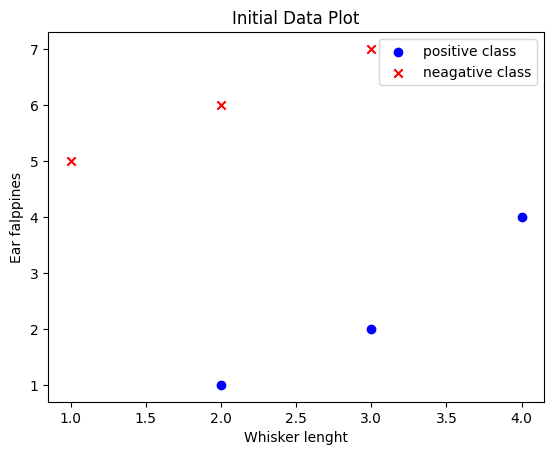

In [54]:
plt.scatter(X[:3 , 0], X[:3 , 1] , color = 'blue' , marker= 'o' , label= 'positive class')
plt.scatter(X[3: , 0], X[3: , 1] , color = 'red' , marker= 'x' , label= 'neagative class')
plt.xlabel('Whisker lenght')
plt.ylabel('Ear falppines')
plt.legend()
plt.title('Initial Data Plot')
plt.show()

LOGISTIC REGRESSION


In [ ]:
#logistic regression
def logistic_regression(X , y , learning_rate= 0.01 , num_iterations = 100):
    #add intercept to X term
    X = np.hstack((np.ones((X.shape[0] , 1)), X))

    #initial weights
    weights = np.zeros(X.shape[1])

    #Gradient descent
    for i in range(num_iterations):
        z = np.dot(X , weights)
        hx = sigmoid(z)
        loss = compute_loss(y , hx)
        gradient = compute_gradient(X , y , hx)
        weights -= learning_rate * gradient

        if i % 20 == 0:
            plot_decision_boundary(X, y , weights , loss , i)
            print(f"Iteration {i} : theta= {weights} , loss= {loss}")
    return weights

In [56]:
#plotting function for decision boundary 
def plot_decision_boundary(X , y , weights , loss , iteration):
    plt.scatter(X[:3 , 1], X[:3 , 2] , color = 'blue' , marker= 'o' , label= 'positive class' if iteration == 0 else '')
    plt.scatter(X[3: , 1], X[3: , 2] , color = 'red' , marker= 'x' , label= 'negative class'  if iteration == 0 else '')

    x_values = np.array([np.min(X[:, 1]) - 1 , np.max(X[: , 1]) + 1])
    y_values = - (weights[0] + weights[1] * x_values) / weights[2]

    plt.plot(x_values , y_values)

    plt.xlim(x_values[0] , x_values[1])
    plt.ylim(np.min(X[:, 2]) -1 , np.max(X[:, 2]) + 1)
    plt.xlabel('Whisker lenght')
    plt.ylabel('Ear falppines')
    plt.title(f'Decision boundary at iteration {iteration}\n Loss : {loss}')
    if iteration == 0 :
       plt.legend()
    
    plt.show()


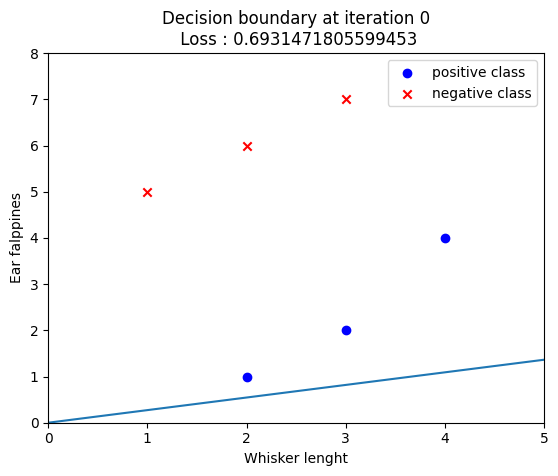

Iteration 0 : theta= [ 0.          0.0025     -0.00916667] , loss= 0.6931471805599453


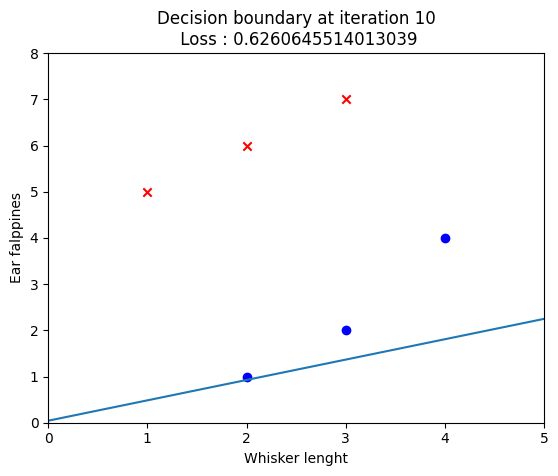

Iteration 10 : theta= [ 0.00351898  0.03583314 -0.08124515] , loss= 0.6260645514013039


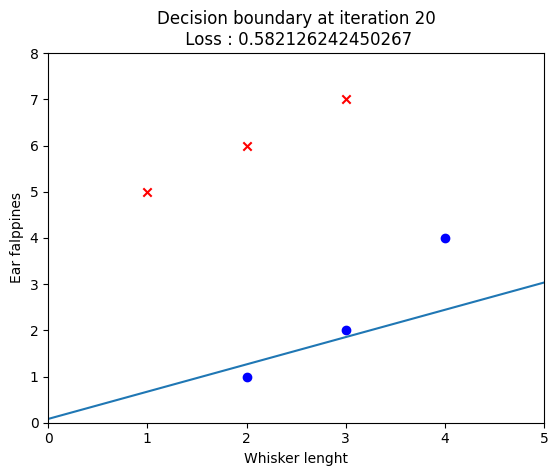

Iteration 20 : theta= [ 0.0107534   0.07750049 -0.13121449] , loss= 0.582126242450267


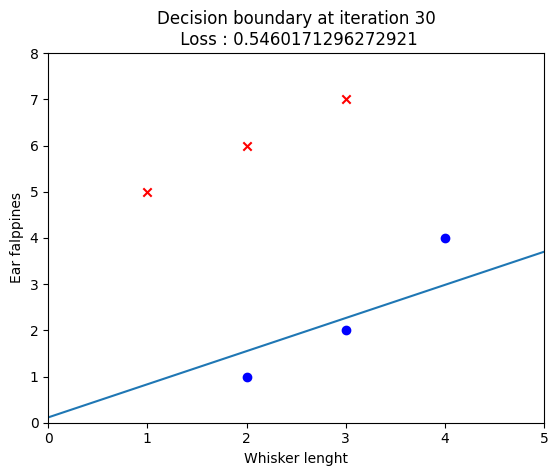

Iteration 30 : theta= [ 0.01952555  0.12200009 -0.17007813] , loss= 0.5460171296272921


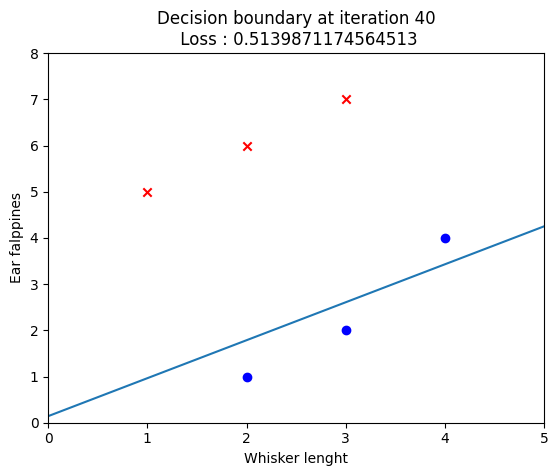

Iteration 40 : theta= [ 0.02882972  0.16681759 -0.20296236] , loss= 0.5139871174564513


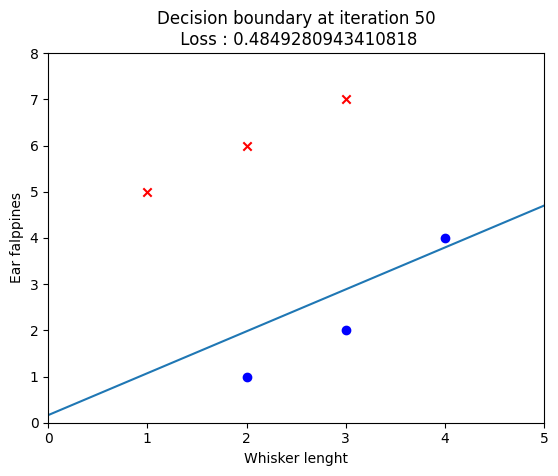

Iteration 50 : theta= [ 0.03819345  0.21079708 -0.23234289] , loss= 0.4849280943410818


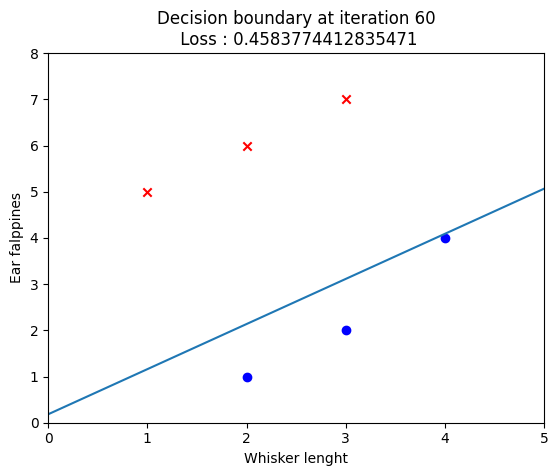

Iteration 60 : theta= [ 0.04739475  0.25342232 -0.25946218] , loss= 0.4583774412835471


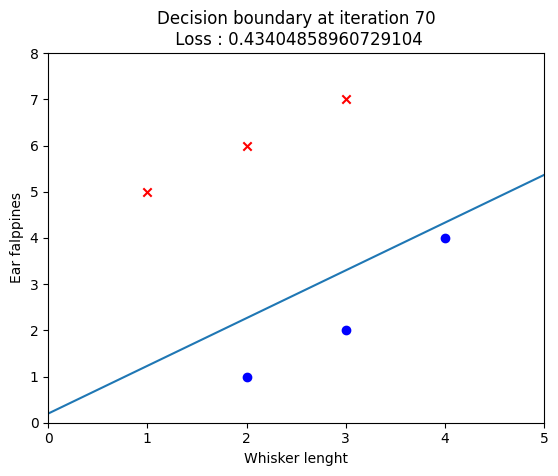

Iteration 70 : theta= [ 0.05633317  0.29448797 -0.28496725] , loss= 0.43404858960729104


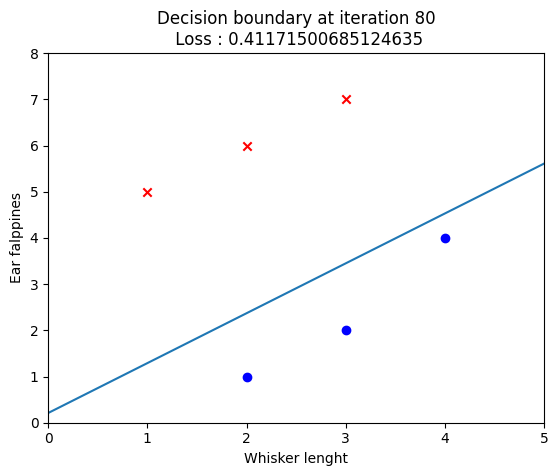

Iteration 80 : theta= [ 0.0649683   0.33394185 -0.30920989] , loss= 0.41171500685124635


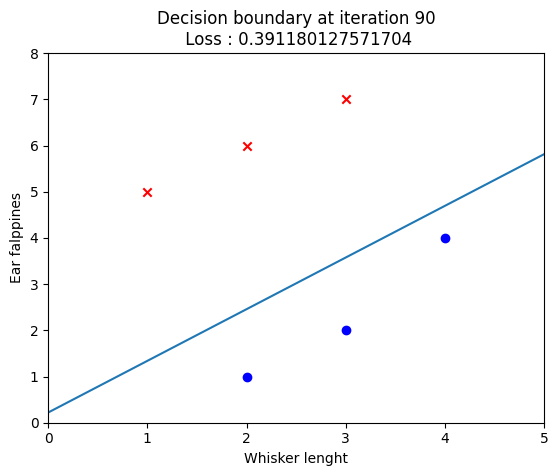

Iteration 90 : theta= [ 0.07328952  0.37180678 -0.33239254] , loss= 0.391180127571704


In [57]:
weights = logistic_regression(X , y)